# IMPORTING ESSENTIAL MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the dataset which is in the CSV format

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Checking for the data and its datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Statistical information

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Checking for null values

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The dataset is already cleaned and there is no null values present

## Handling duplicate values in the dataset

In [6]:
df.drop_duplicates(keep="first")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

## Total number of people having diabetes

In [8]:
a=df[df["diabetes"]==1].shape[0]/df.shape[0]*100
print("Total Number of people having diabetes:", a,"%")

Total Number of people having diabetes: 8.5 %


In [9]:
df['blood_glucose_level']

0        140
1         80
2        158
3        155
4        155
        ... 
99995     90
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 100000, dtype: int64

## Number of people having sugar level below and above 120

In [10]:
c=0
for i in df['blood_glucose_level']:
   if(i<=120):
    c+=1
print("There are ",c,"with sugar level below 120")

There are  28144 with sugar level below 120


In [11]:
c=0
for i in df['blood_glucose_level']:
   if(i>=120):
    c+=1
print("There are ",c,"with sugar level above 120")

There are  71856 with sugar level above 120


In [12]:
for i in df['blood_glucose_level'].unique():
    print(i)

140
80
158
155
85
200
145
100
130
160
126
159
90
260
220
300
280
240


## Visualising the data based on the features

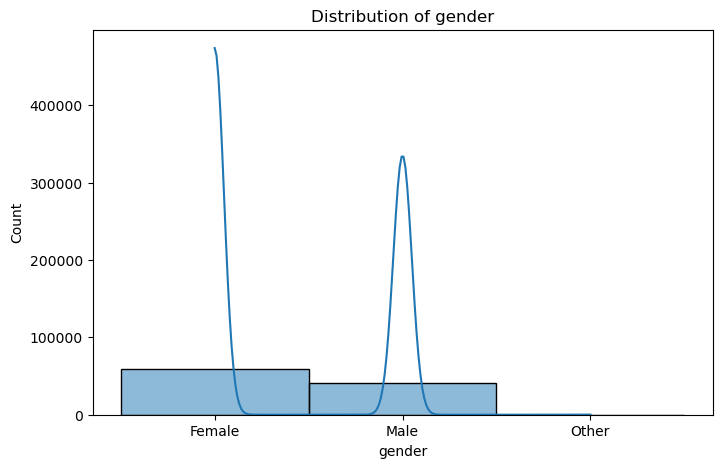

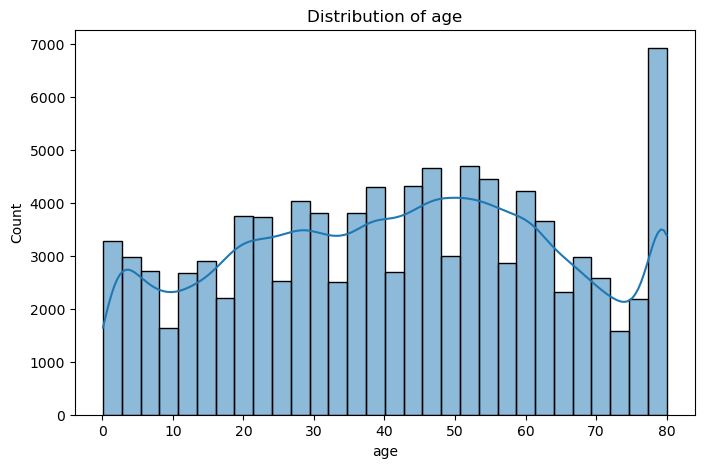

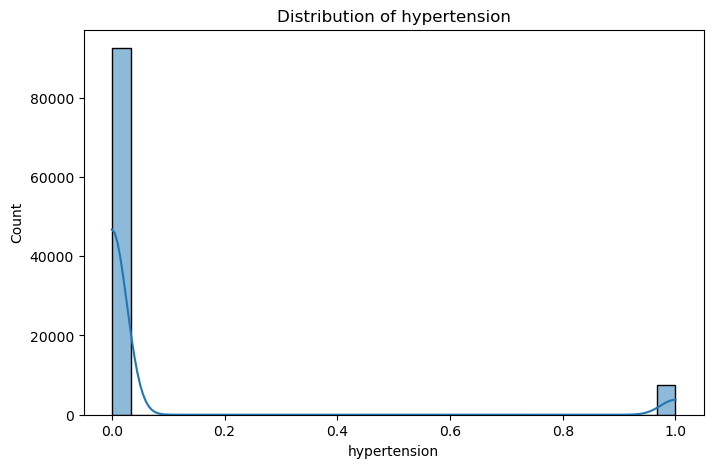

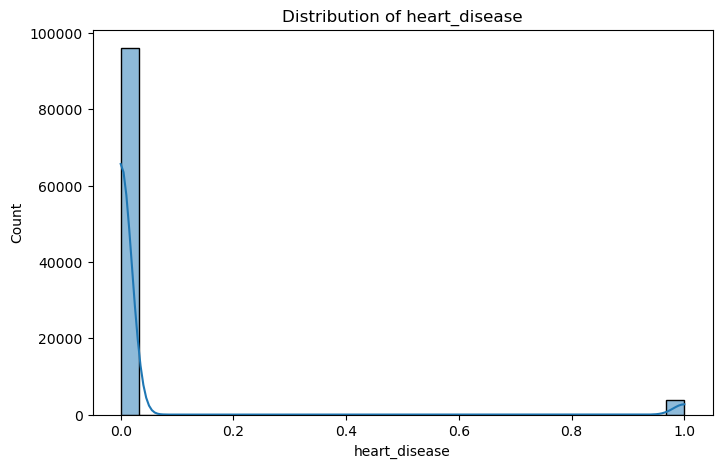

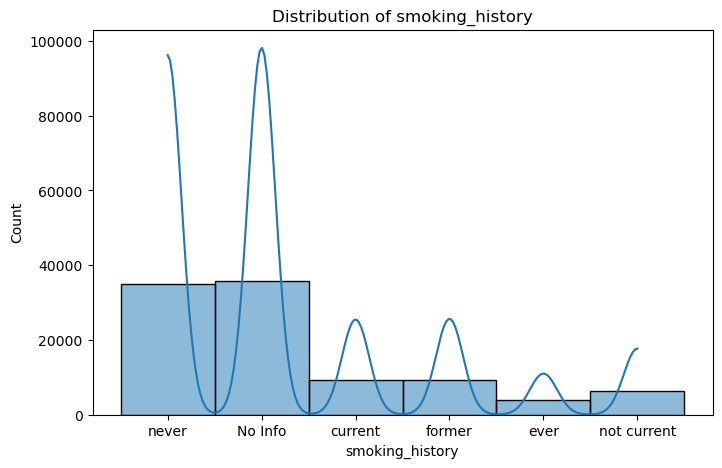

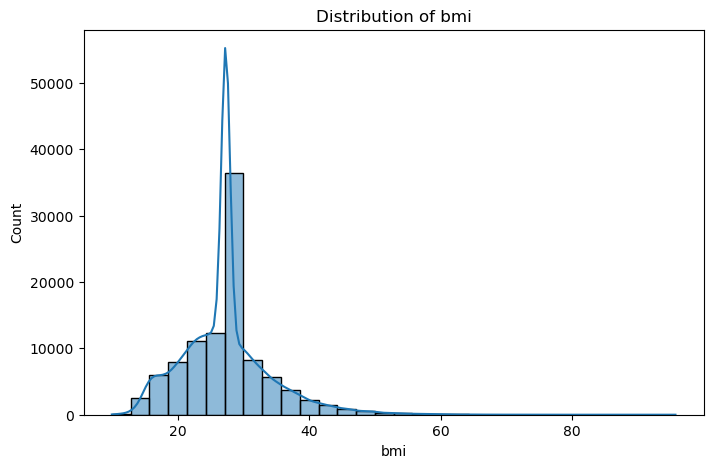

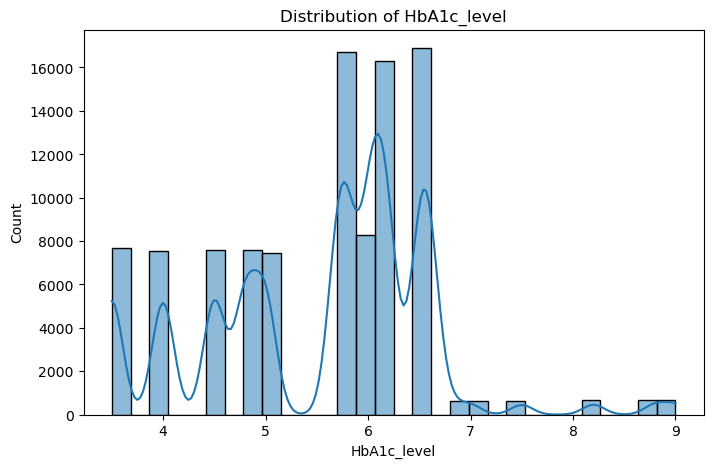

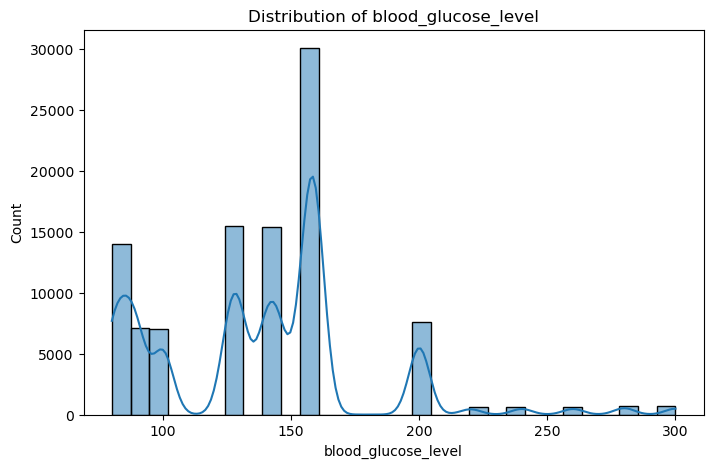

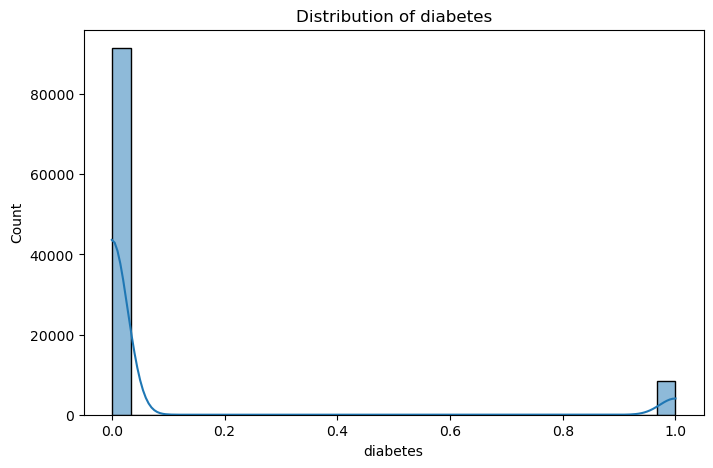

In [13]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [14]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=="object"]
    num_col=[col for col in df.columns if df[col].dtype!="object"]
    return cat_col, num_col

In [15]:
cat_col,num_col=extract_cat_num(df)

In [16]:
cat_col

['gender', 'smoking_history']

In [17]:
num_col

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [18]:
for col in num_col:
    print(f"{col} has {df[col].unique()} values")
    print("\n")

age has [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48] values


hypertension has [0 1] values


heart_disease has [1 0] values


bmi has [25.19 27.32 23.45 ... 59.42 44.39 60.52] values


HbA1c_level has [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8] values


blood_glucose_level has [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240] values


diabetes has [0 1] values




In [19]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values")
    print("\n")

gender has ['Female' 'Male' 'Other'] values


smoking_history has ['never' 'No Info' 'current' 'former' 'ever' 'not current'] values




<Axes: xlabel='diabetes', ylabel='count'>

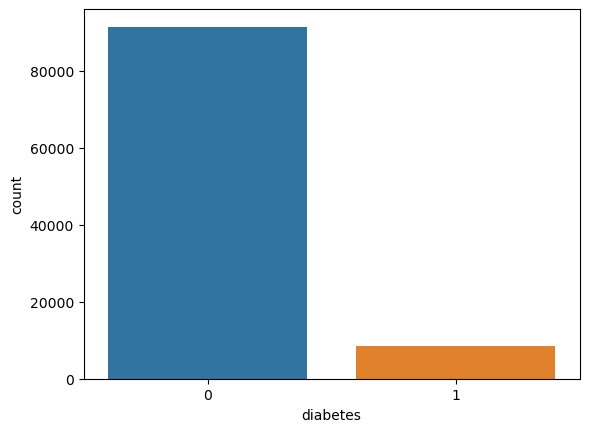

In [20]:
sns.countplot(data=df,x="diabetes")

## Finding correlation between the features of the data

In [21]:
corr=df.select_dtypes(exclude=["object"]).corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

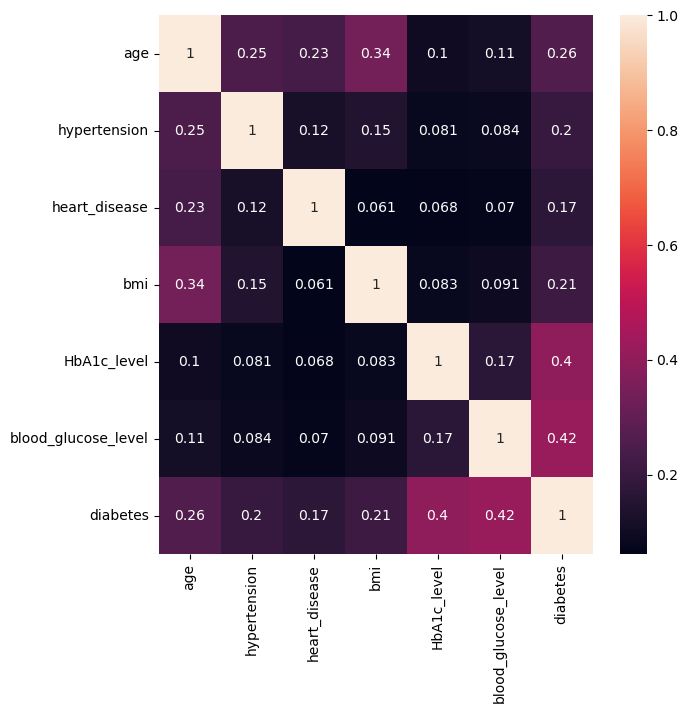

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

In [23]:
for col in cat_col:
    print(f"{col} has {df[col].nunique()} categories")

gender has 3 categories
smoking_history has 6 categories


## Seperating feature and target

In [24]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

## Encoding the categorical columns

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),["gender","smoking_history"])],remainder="passthrough")

In [26]:
x=ct.fit_transform(x)

In [27]:
x[0]

array([  1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
         0.  ,  80.  ,   0.  ,   1.  ,  25.19,   6.6 , 140.  ])

## Splitting the data into Training and Testing data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [29]:
xtrain

array([[  1.  ,   0.  ,   0.  , ...,  36.26,   4.  , 130.  ],
       [  0.  ,   1.  ,   0.  , ...,  30.68,   5.8 , 155.  ],
       [  1.  ,   0.  ,   0.  , ...,  38.19,   3.5 , 200.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  28.36,   5.8 ,  90.  ],
       [  1.  ,   0.  ,   0.  , ...,  57.51,   6.2 , 126.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   6.  ,  90.  ]])

## Standardisation(Scaling of the data)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [31]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
l=LinearRegression()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()

## Build the Model

In [32]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f"Training {train} and Testing {test}")
    print(confusion_matrix(ytest,ypred))
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
    
    return(model)

In [33]:
mymodel(lr)

Training 0.960075 and Testing 0.9614
[[18150   149]
 [  623  1078]]
0.9614
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.88      0.63      0.74      1701

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



LogisticRegression()

In [34]:
mymodel(svm)

Training 0.9634875 and Testing 0.9623
[[18259    40]
 [  714   987]]
0.9623
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18299
           1       0.96      0.58      0.72      1701

    accuracy                           0.96     20000
   macro avg       0.96      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



SVC()

In [35]:
mymodel(dt)

Training 0.9992625 and Testing 0.95
[[17737   562]
 [  438  1263]]
0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18299
           1       0.69      0.74      0.72      1701

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000



DecisionTreeClassifier()

## Ensemble techniques

In [36]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())

In [37]:
mymodel(bg)

Training 0.9600375 and Testing 0.9613
[[18149   150]
 [  624  1077]]
0.9613
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.88      0.63      0.74      1701

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



BaggingClassifier(estimator=LogisticRegression())

In [38]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [39]:
mymodel(ad)

Training 0.971875 and Testing 0.97235
[[18258    41]
 [  512  1189]]
0.97235
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18299
           1       0.97      0.70      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



AdaBoostClassifier()

In [40]:
mymodel(gb)

Training 0.9723 and Testing 0.9724
[[18279    20]
 [  532  1169]]
0.9724
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18299
           1       0.98      0.69      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



GradientBoostingClassifier()

In [41]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mymodel(xgb)

Training 0.9755625 and Testing 0.96655
[[18265    34]
 [  635  1066]]
0.96655
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.97      0.63      0.76      1701

    accuracy                           0.97     20000
   macro avg       0.97      0.81      0.87     20000
weighted avg       0.97      0.97      0.96     20000



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
models=[lr,svm,dt,ad,gb,bg,xgb]
acc=[]
train=[]
test=[]
report=[]
for i in models:
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    train.append(i.score(xtrain,ytrain))
    test.append(i.score(xtest,ytest))
    acc.append(accuracy_score(ytest,ypred)*100)

In [43]:
labels=['LogisticRegression()','SVC',
 'DecisionTreeClassifier()',
 'AdaBoostClassifier()',
 'GradientBoostingClassifier()',
 'BaggingClassifier(logisticRegression())',
 'XGBClassifier()']

In [44]:
m={"Model":labels,"Accuracy":acc,"Training_score":train,"Testing_score":test}
model_df=pd.DataFrame(m)
model_df

,Model,Accuracy,Training_score,Testing_score
0,LogisticRegression(),96.140,0.960075,0.96140
1,SVC,96.230,0.963488,0.96230
2,DecisionTreeClassifier(),95.060,0.999263,0.95060
3,AdaBoostClassifier(),97.235,0.971875,0.97235
4,GradientBoostingClassifier(),97.240,0.972300,0.97240
5,BaggingClassifier(logisticRegression()),96.130,0.960050,0.96130
6,XGBClassifier(),96.655,0.975562,0.96655


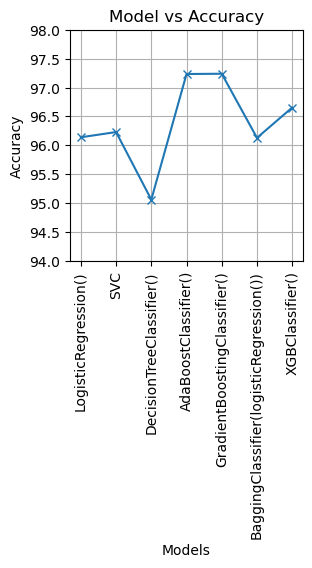

In [52]:
plt.figure(figsize=(3,3))
plt.plot(model_df["Model"],model_df["Accuracy"],marker="x")
plt.title("Model vs Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(94,98)
plt.xticks(rotation=90)
plt.grid()
plt.show()